In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix


In [9]:
np.random.seed(42)

# Simulated dataset
data = {
    'Road_Condition': np.random.choice(['Wet', 'Dry'], size=100),
    'Weather': np.random.choice(['Clear', 'Rainy', 'Foggy'], size=100),
    'Accident_Severity': np.random.choice(['Minor', 'Major'], size=100)
}

df = pd.DataFrame(data)


       Road_Condition Weather Accident_Severity
count             100     100               100
unique              2       3                 2
top               Dry   Foggy             Major
freq               56      39                53


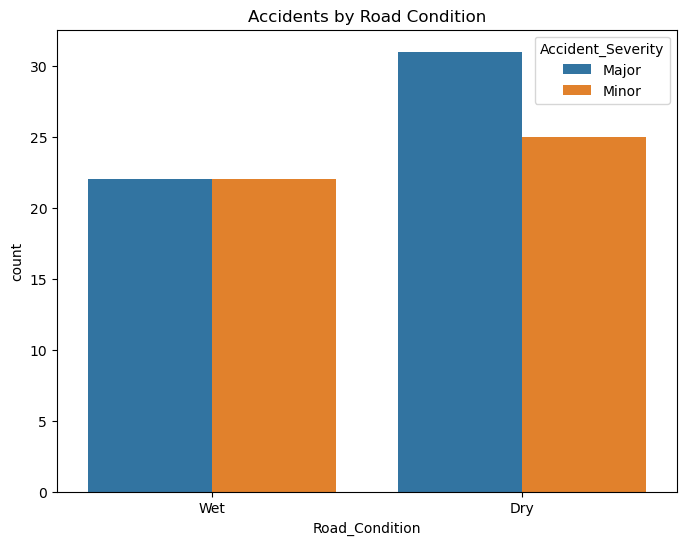

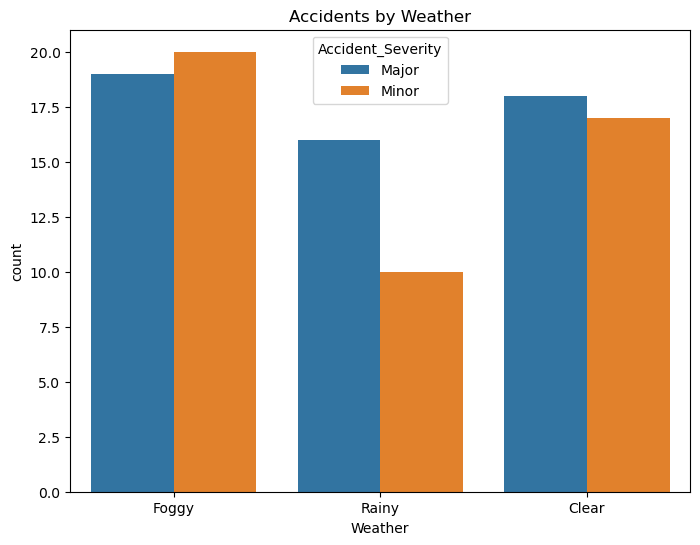

In [3]:
# Summary statistics
print(df.describe())

# Countplot of Road Condition
plt.figure(figsize=(8, 6))
sns.countplot(x='Road_Condition', data=df, hue='Accident_Severity')
plt.title('Accidents by Road Condition')
plt.show()

# Countplot of Weather
plt.figure(figsize=(8, 6))
sns.countplot(x='Weather', data=df, hue='Accident_Severity')
plt.title('Accidents by Weather')
plt.show()


In [4]:
# Convert categorical variables to numerical
df['Road_Condition'] = df['Road_Condition'].astype('category').cat.codes
df['Weather'] = df['Weather'].astype('category').cat.codes

# Split data into training and testing sets
X = df[['Road_Condition', 'Weather']]
y = df['Accident_Severity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Accuracy: 0.45


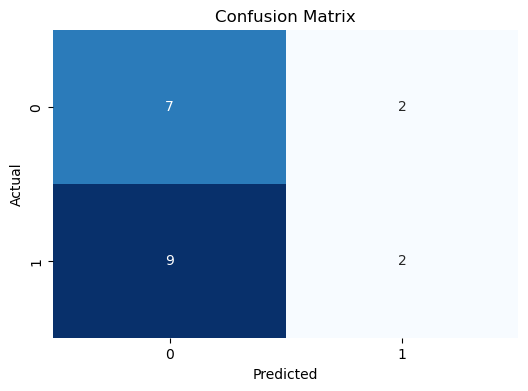

In [5]:
# Initialize Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)

# Train the classifier
clf.fit(X_train, y_train)

# Predict on test data
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


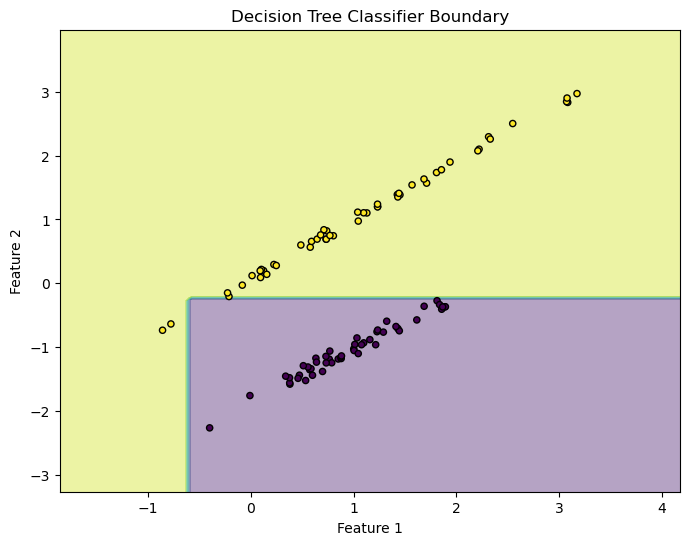

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification

# Generate synthetic dataset
X, y = make_classification(n_samples=100, n_features=2, n_redundant=0, n_informative=2,
                           random_state=42, n_clusters_per_class=1)

# Fit a decision tree classifier
clf = DecisionTreeClassifier(max_depth=3, random_state=42)
clf.fit(X, y)

# Plot decision boundary
plt.figure(figsize=(8, 6))

# Plot decision regions
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.4, cmap='viridis')

# Plot data points
plt.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k', cmap='viridis')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title('Decision Tree Classifier Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()
